In [1]:
import sys
sys.path.append('./src')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from icecream import ic
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
  
from src.data import load_data_part1
from src.eval import print_score

In [2]:
X, y = load_data_part1()
def create_n_sentence(y, n):
    """
    
    """
    prev_y_value = y[0]
    bloc_list = []
    current_bloc = []
    current_bloc_length = 0

    for idx in range(len(y)):
        if current_bloc_length < n:
            current_bloc_length += 1
            if prev_y_value == y[idx]:
                current_bloc.append(idx)
            else:
                bloc_list.append(current_bloc)
                current_bloc = [idx]
                current_bloc_length = 1
        else:
            bloc_list.append(current_bloc)
            current_bloc = [idx]
            current_bloc_length = 1
        prev_y_value = y[idx]
    bloc_list.append(current_bloc)
    return bloc_list
    
nested_idx = create_n_sentence(y, 2)
nested_idx[0:5], y[0:14]

([[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]],
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1]))

In [3]:
def create_nested_dataset(X, y, n):
    def merge_string(l):
        s = ""
        for i in l:
            s += i
        return s
    
    new_X = []
    new_y = []
    nested_idx = create_n_sentence(y, n)
    for idx_list in nested_idx:
        new_X.append(merge_string(X[idx_list]))
        new_y.append(y[idx_list[0]])
    return new_X, new_y, nested_idx

nested_X, nested_y, nested_idx = create_nested_dataset(X, y, 2)
nested_X[0], X[nested_idx[0]], nested_y[0]

(" Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.\n D'abord merci de cet exceptionnel accueil que les Congolais, les Brazavillois, nous ont réservé cet après-midi.\n",
 array([" Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.\n",
        " D'abord merci de cet exceptionnel accueil que les Congolais, les Brazavillois, nous ont réservé cet après-midi.\n"],
       dtype='<U2530'),
 1)

In [4]:
d = joblib.load("./part1_speaker_recognition/gridsearch/results/part1_hrscv_LogisticRegression.pkl")

nested_X, nested_y, nested_idx = create_nested_dataset(X, y, 2)
X_train, X_test, y_train, y_test = train_test_split(nested_X, nested_y)
pipeline = d.best_estimator_
pipeline.fit(X_train, y_train)
print(y_train)
y_hat = pipeline.predict(X_test)

100%|██████████| 21687/21687 [00:05<00:00, 4161.17it/s]


[1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1

100%|██████████| 7229/7229 [00:01<00:00, 5681.85it/s]


In [5]:
print_score(y_test, y_hat, "oui")


    oui :
    =====
    Macro F1-score : 0.8390282363847095
    Micro F1-score : 0.9251625397703693
    Macro ROC-AUC: 0.8440077843761223
    Weighted ROC-AUC: 0.8440077843761223
    Classification report :
                  precision    recall  f1-score   support

          -1       0.71      0.73      0.72       954
           1       0.96      0.95      0.96      6275

    accuracy                           0.93      7229
   macro avg       0.83      0.84      0.84      7229
weighted avg       0.93      0.93      0.93      7229

    =====
    


{'-1': {'precision': 0.7092198581560284,
  'recall': 0.7337526205450734,
  'f1-score': 0.7212776919113859,
  'support': 954},
 '1': {'precision': 0.9593079141300865,
  'recall': 0.9542629482071713,
  'f1-score': 0.9567787808580331,
  'support': 6275},
 'accuracy': 0.9251625397703693,
 'macro avg': {'precision': 0.8342638861430575,
  'recall': 0.8440077843761223,
  'f1-score': 0.8390282363847095,
  'support': 7229},
 'weighted avg': {'precision': 0.9263041784267734,
  'recall': 0.9251625397703693,
  'f1-score': 0.9257000647347655,
  'support': 7229},
 'macro_auc': 0.8440077843761223,
 'micro_auc': 0.8440077843761223}

In [6]:
nested_X, nested_y, _ = create_nested_dataset(X, y, 3)
X_train, X_test, y_train, y_test = train_test_split(nested_X, nested_y)
pipeline = d.best_estimator_
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
print_score(y_test, y_hat, "oui")

100%|██████████| 4851/4851 [00:01<00:00, 2690.64it/s]



    oui :
    =====
    Macro F1-score : 0.8807504874116063
    Micro F1-score : 0.9428983714698
    Macro ROC-AUC: 0.8800425185132694
    Weighted ROC-AUC: 0.8800425185132694
    Classification report :
                  precision    recall  f1-score   support

          -1       0.80      0.79      0.79       676
           1       0.97      0.97      0.97      4175

    accuracy                           0.94      4851
   macro avg       0.88      0.88      0.88      4851
weighted avg       0.94      0.94      0.94      4851

    =====
    


{'-1': {'precision': 0.7964338781575037,
  'recall': 0.7928994082840237,
  'f1-score': 0.7946627131208303,
  'support': 676},
 '1': {'precision': 0.9664911440880805,
  'recall': 0.967185628742515,
  'f1-score': 0.9668382617023825,
  'support': 4175},
 'accuracy': 0.9428983714698,
 'macro avg': {'precision': 0.8814625111227921,
  'recall': 0.8800425185132694,
  'f1-score': 0.8807504874116063,
  'support': 4851},
 'weighted avg': {'precision': 0.9427932030926013,
  'recall': 0.9428983714698,
  'f1-score': 0.9428451322772889,
  'support': 4851},
 'macro_auc': 0.8800425185132694,
 'micro_auc': 0.8800425185132694}

In [7]:
nested_X, nested_y, _ = create_nested_dataset(X, y, 4)
X_train, X_test, y_train, y_test = train_test_split(nested_X, nested_y)
pipeline = d.best_estimator_
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
print_score(y_test, y_hat, "oui")

100%|██████████| 3664/3664 [00:01<00:00, 2651.27it/s]



    oui :
    =====
    Macro F1-score : 0.8915531822400085
    Micro F1-score : 0.9475982532751092
    Macro ROC-AUC: 0.8934753727791878
    Weighted ROC-AUC: 0.8934753727791878
    Classification report :
                  precision    recall  f1-score   support

          -1       0.81      0.82      0.81       512
           1       0.97      0.97      0.97      3152

    accuracy                           0.95      3664
   macro avg       0.89      0.89      0.89      3664
weighted avg       0.95      0.95      0.95      3664

    =====
    


{'-1': {'precision': 0.8088803088803089,
  'recall': 0.818359375,
  'f1-score': 0.8135922330097087,
  'support': 512},
 '1': {'precision': 0.9704386522568341,
  'recall': 0.9685913705583756,
  'f1-score': 0.9695141314703081,
  'support': 3152},
 'accuracy': 0.9475982532751092,
 'macro avg': {'precision': 0.8896594805685716,
  'recall': 0.8934753727791878,
  'f1-score': 0.8915531822400085,
  'support': 3664},
 'weighted avg': {'precision': 0.9478628138810752,
  'recall': 0.9475982532751092,
  'f1-score': 0.9477259185849841,
  'support': 3664},
 'macro_auc': 0.8934753727791878,
 'micro_auc': 0.8934753727791878}

100%|██████████| 2951/2951 [00:01<00:00, 2653.24it/s]


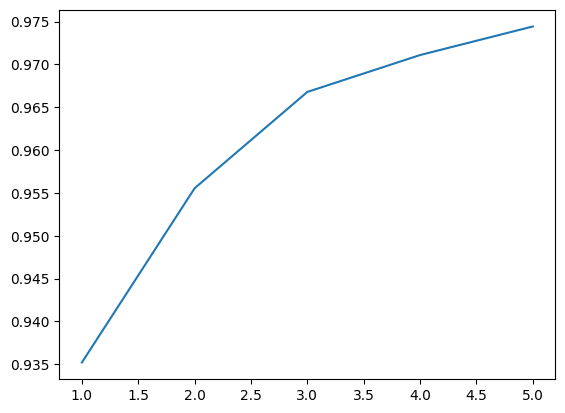

In [8]:
score_list = []
param_list = []
for i in range(1, 6):
    nested_X, nested_y, _ = create_nested_dataset(X, y, i)
    X_train, X_test, y_train, y_test = train_test_split(nested_X, nested_y)
    pipeline = d.best_estimator_
    pipeline.fit(X_train, y_train)
    y_hat = pipeline.predict(X_test)
    score_list.append(f1_score(y_test, y_hat))
    param_list.append(i)
plt.plot(param_list, score_list)

Ca marche bien mais on triche dans le train test split

In [9]:
def unnest_result(y_hat_nested, nested_idx):
    """
    Unnest un y_hat nested pour pouvoir l'utiliser avec un y_true non nested
    """
    l = []
    for i, idx_list in enumerate(nested_idx):
        for _ in idx_list:
            l.append(y_hat_nested[i])
    return l

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
score_list = []
param_list = []

# Baseline 
pipeline = d.best_estimator_
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
score_list.append(f1_score(y_test, y_hat, pos_label=-1))
param_list.append(0)

for i in range(1, 10):
    nested_X_train, nested_y_train, _  = create_nested_dataset(X_train, y_train, i)
    nested_X_test, nested_y_test, nested_idx = create_nested_dataset(X_test, [1 for i in range(len(X_test))], i) # sans regarder les y 


    pipeline = d.best_estimator_
    pipeline.fit(nested_X_train, nested_y_train)
    y_hat_nested = pipeline.predict(nested_X_test)
    
    y_hat = unnest_result(y_hat_nested, nested_idx)
    print_score(y_test, y_hat, f'n = {i}')
    score_list.append(f1_score(y_test, y_hat, pos_label=-1))
    param_list.append(i)

# plt.plot(param_list, score_list)

100%|██████████| 14354/14354 [00:00<00:00, 14762.26it/s]



    n = 1 :
    =====
    Macro F1-score : 0.7864642547401168
    Micro F1-score : 0.8962658492406298
    Macro ROC-AUC: 0.8127118735513237
    Weighted ROC-AUC: 0.8127118735513237
    Classification report :
                  precision    recall  f1-score   support

          -1       0.58      0.70      0.63      1836
           1       0.95      0.92      0.94     12518

    accuracy                           0.90     14354
   macro avg       0.77      0.81      0.79     14354
weighted avg       0.91      0.90      0.90     14354

    =====
    


100%|██████████| 7177/7177 [00:00<00:00, 7726.91it/s]



    n = 2 :
    =====
    Macro F1-score : 0.6694454679439941
    Micro F1-score : 0.8489619618224885
    Macro ROC-AUC: 0.673579587877117
    Weighted ROC-AUC: 0.673579587877117
    Classification report :
                  precision    recall  f1-score   support

          -1       0.41      0.44      0.43      1836
           1       0.92      0.91      0.91     12518

    accuracy                           0.85     14354
   macro avg       0.67      0.67      0.67     14354
weighted avg       0.85      0.85      0.85     14354

    =====
    


100%|██████████| 4785/4785 [00:00<00:00, 4989.33it/s]



    n = 3 :
    =====
    Macro F1-score : 0.6117293464081286
    Micro F1-score : 0.8489619618224885
    Macro ROC-AUC: 0.5989828242102614
    Weighted ROC-AUC: 0.5989828242102614
    Classification report :
                  precision    recall  f1-score   support

          -1       0.37      0.26      0.31      1836
           1       0.90      0.93      0.92     12518

    accuracy                           0.85     14354
   macro avg       0.63      0.60      0.61     14354
weighted avg       0.83      0.85      0.84     14354

    =====
    


100%|██████████| 3589/3589 [00:00<00:00, 3791.93it/s]



    n = 4 :
    =====
    Macro F1-score : 0.5638298173478391
    Micro F1-score : 0.8534206492963634
    Macro ROC-AUC: 0.5536670767080153
    Weighted ROC-AUC: 0.5536670767080153
    Classification report :
                  precision    recall  f1-score   support

          -1       0.34      0.15      0.21      1836
           1       0.88      0.96      0.92     12518

    accuracy                           0.85     14354
   macro avg       0.61      0.55      0.56     14354
weighted avg       0.81      0.85      0.83     14354

    =====
    


100%|██████████| 2871/2871 [00:00<00:00, 3053.61it/s]



    n = 5 :
    =====
    Macro F1-score : 0.5244672416273637
    Micro F1-score : 0.8619896892852167
    Macro ROC-AUC: 0.5267427540507247
    Weighted ROC-AUC: 0.5267427540507247
    Classification report :
                  precision    recall  f1-score   support

          -1       0.33      0.08      0.12      1836
           1       0.88      0.98      0.93     12518

    accuracy                           0.86     14354
   macro avg       0.60      0.53      0.52     14354
weighted avg       0.81      0.86      0.82     14354

    =====
    


100%|██████████| 2393/2393 [00:00<00:00, 2706.89it/s]



    n = 6 :
    =====
    Macro F1-score : 0.5102856831798325
    Micro F1-score : 0.8621986902605545
    Macro ROC-AUC: 0.5184965893122617
    Weighted ROC-AUC: 0.5184965893122617
    Classification report :
                  precision    recall  f1-score   support

          -1       0.30      0.06      0.10      1836
           1       0.88      0.98      0.93     12518

    accuracy                           0.86     14354
   macro avg       0.59      0.52      0.51     14354
weighted avg       0.80      0.86      0.82     14354

    =====
    


100%|██████████| 2051/2051 [00:00<00:00, 2158.89it/s]



    n = 7 :
    =====
    Macro F1-score : 0.4868368968037807
    Micro F1-score : 0.8671450466768845
    Macro ROC-AUC: 0.5076215739531154
    Weighted ROC-AUC: 0.5076215739531154
    Classification report :
                  precision    recall  f1-score   support

          -1       0.28      0.02      0.05      1836
           1       0.87      0.99      0.93     12518

    accuracy                           0.87     14354
   macro avg       0.58      0.51      0.49     14354
weighted avg       0.80      0.87      0.82     14354

    =====
    


100%|██████████| 1795/1795 [00:00<00:00, 1990.35it/s]



    n = 8 :
    =====
    Macro F1-score : 0.4761414171331845
    Micro F1-score : 0.869862059356277
    Macro ROC-AUC: 0.5036020026586552
    Weighted ROC-AUC: 0.5036020026586552
    Classification report :
                  precision    recall  f1-score   support

          -1       0.28      0.01      0.02      1836
           1       0.87      1.00      0.93     12518

    accuracy                           0.87     14354
   macro avg       0.58      0.50      0.48     14354
weighted avg       0.80      0.87      0.81     14354

    =====
    


100%|██████████| 1595/1595 [00:00<00:00, 1761.53it/s]



    n = 9 :
    =====
    Macro F1-score : 0.48018294396982275
    Micro F1-score : 0.869862059356277
    Macro ROC-AUC: 0.5054611120335301
    Weighted ROC-AUC: 0.5054611120335301
    Classification report :
                  precision    recall  f1-score   support

          -1       0.32      0.02      0.03      1836
           1       0.87      1.00      0.93     12518

    accuracy                           0.87     14354
   macro avg       0.60      0.51      0.48     14354
weighted avg       0.80      0.87      0.82     14354

    =====
    


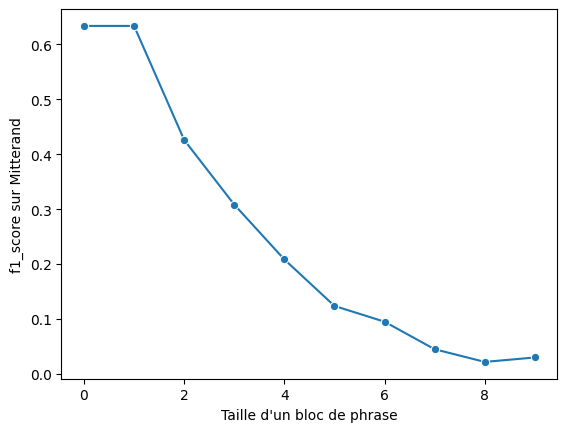

In [16]:
df = pd.DataFrame({
    "Taille d'un bloc de phrase": param_list,
    "f1_score sur Mitterand": score_list
})
sns.lineplot(data=df, x="Taille d'un bloc de phrase", y="f1_score sur Mitterand", marker="o") # performance en test des bloc de phrase.
plt.savefig('final_report/n-sentence_bloc_perf.png')